In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv', encoding = 'latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#To know what all are the columns present in the dataset
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#to find the missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
#other way to know the missing data in the specific columns
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [7]:
# merging two files as one dataFrame
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')

In [9]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [10]:
country_names = final_df.Country.value_counts()
country_names

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [11]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [12]:
country_val = final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

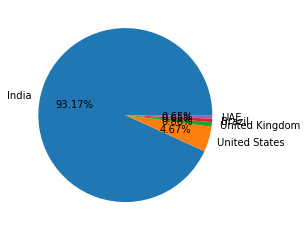

In [13]:
# pie plot to understanf which all are the top-5 countries that uses maximum of zomato orders
plt.pie(country_val[:5],labels = country_names[:5],autopct= '%1.2f%%')
plt.show()

Observation: Zomato's maximum transactions/orders are done in INDIA followed  by USA,UK,BRAZIL,UAE

In [14]:
# to find the relationship of specific columns
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [15]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [16]:
#converting into a dataframe
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [17]:
# renaming the columns to appropriate names
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. If the rating is in btween 4.5-4.9 ---> Excellent
2. If the rating is in btween 4.0-4.4 ---> Very good
3. If the rating is in btween 3.5-3.9 ---> Good
4. If the rating is in btween 3.0-3.4 ---> Average
5. If the rating is in btween 2.5-2.9 ---> Average
6. If the rating is in btween 2.0-2.4 ---> Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

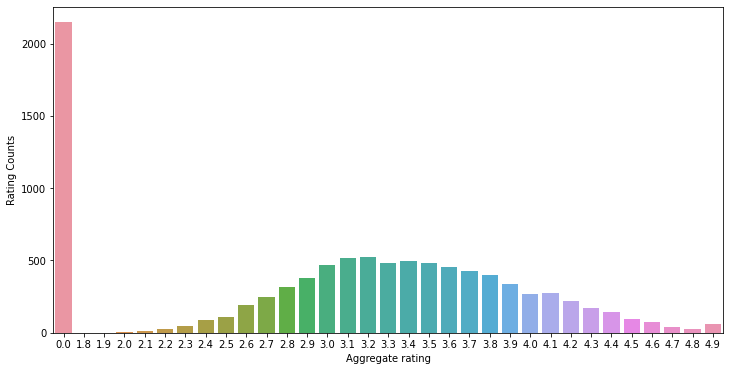

In [18]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating', y='Rating Counts',data= ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

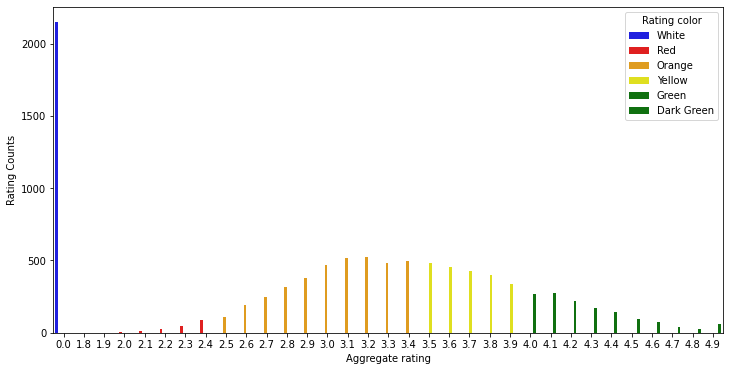

In [19]:
# Mapping the colors in the to the barplot corresponding to RATING COLORS
sns.barplot(x='Aggregate rating', y='Rating Counts',data= ratings,hue='Rating color', palette=['blue','red','orange','yellow','green','green'])


## Observation
1. Maximum no of people not rated is very high
2. Maximum no of rating is between 2.5 to 3.4

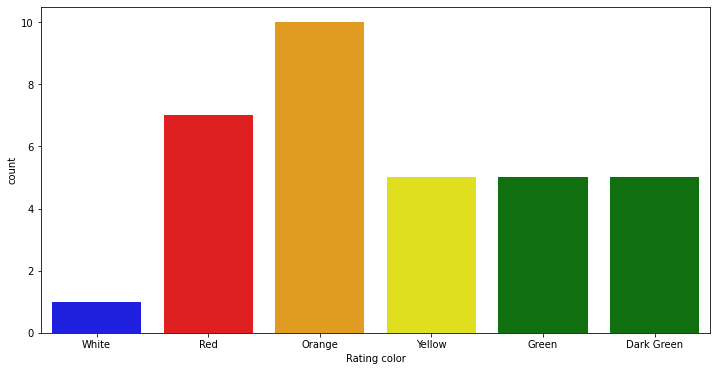

In [20]:
# count plot for certain categorical value
sns.countplot(x='Rating color', data = ratings, palette=['blue','red','orange','yellow','green','green'])
plt.show()

In [21]:
# Finding the countries name that has given  ratings
final_df.groupby(['Aggregate rating','Country']).size()

Aggregate rating  Country       
0.0               Brazil               5
                  India             2139
                  United Kingdom       1
                  United States        3
1.8               India                1
                                    ... 
4.9               Sri Lanka            1
                  Turkey               3
                  UAE                  4
                  United Kingdom       4
                  United States       14
Length: 222, dtype: int64

In [22]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [23]:
# Finding the countries name that has given  ratings with another method
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Oservation
Maximum no of 0 ratings are from INDIAN customers

In [24]:
# Finding out which currency is used by which country
# final_df.columns
final_df.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [25]:
# Which country have online deliveries option 
final_df.groupby(['Has Online delivery' ,'Country']).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

In [26]:
final_df.groupby(['Has Online delivery' ,'Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [27]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

## Observation
Online deliveries are available in INDIA and UAE

In [28]:
# Finding the top 5 cities that orders from zomato
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [29]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index

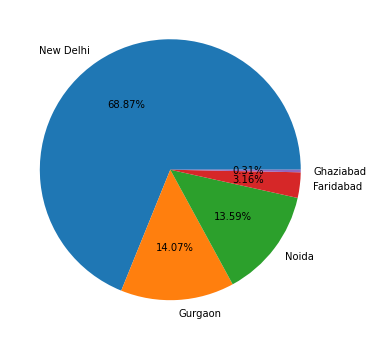

In [30]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

In [31]:
# finding out the top 10 Cuisines
final_df['Cuisines'].value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [32]:
cuisines_values = final_df['Cuisines'].value_counts().values
cuisines_labels = final_df.Cuisines.value_counts().index

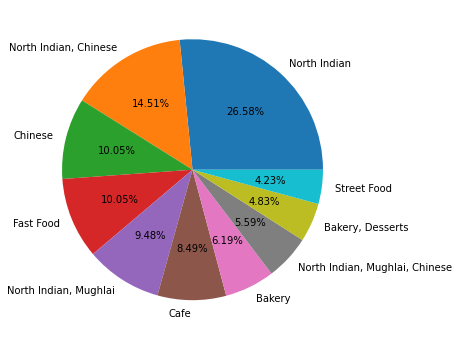

In [33]:
plt.pie(cuisines_values[:10],labels=cuisines_labels[:10],autopct='%1.2f%%')
plt.show()

In [34]:
import dtale

In [35]:
dtale.show(final_df)

2022-04-11 13:46:54,219 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-04-11 13:46:54,345 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-04-11 13:46:54,381 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
